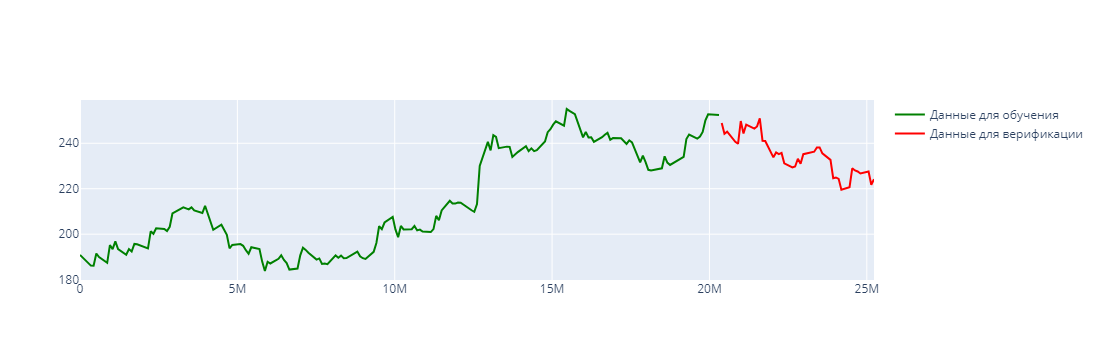

In [35]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

data1 = pd.read_csv('DataSet1_3.csv', sep = ',')
data2 = pd.read_csv('DataSet1_4.csv', sep = ',')

data3 = pd.read_csv('DataSet3_1.csv', sep = ',')
data4 = pd.read_csv('DataSet3_2.csv', sep = ';')

data1[["Date"]] = data1[["Date"]].apply(pd.to_datetime)
data1['Date'] =   (data1['Date']).astype(np.int64)/1000000000 #нс -> c

start_idx = 100
end_idx = 300

# преобразование в отсчет в секундах начиная от 100го индекса
x = data1['Date'][start_idx:end_idx].to_numpy() - data1['Date'][start_idx]
y =  data1['Close'][start_idx:end_idx].to_numpy()

n = round(0.8*(end_idx - start_idx))

train_x = x[0:n]
train_y = y[0:n]

test_x = x[n:]
test_y = y[n:]


fig = go.Figure()

fig.add_trace(go.Scatter(
                    x=train_x,
                    y=train_y,
                    line=dict(color='green', width=2),
                    name='Данные для обучения',
                   )
)
fig.add_trace(go.Scatter(
                    x=test_x,
                    y=test_y,
                    line=dict(color='red', width=2),
                    name='Данные для верификации',
                    )
)

fig.show()


### МНК

In [83]:
from scipy.optimize import curve_fit 

def mapping_func(x, c1 , c2, c3): 
    return c1 * x**2 + c2 * x + c3 

args, covar = curve_fit(mapping_func, train_x, train_y) 

c1, c2, c3 = args[0], args[1], args[2]

res_y  = c1 * train_x**2 + c2 * train_x + c3 

fig = go.Figure()

fig.add_trace(go.Scatter(
                    x=train_x,
                    y=train_y,
                    line=dict(color='green', width=2),
                    name='Данные для обучения',
                   )
)
fig.add_trace(go.Scatter(
                    x=train_x,
                    y=res_y,
                    line=dict(color='red', width=2),
                    name='МНК',
                    )
)
fig.show()


### Регрессионная функция для прогнозного участка

In [82]:
res_y  = c1 * test_x**2 + c2 * test_x + c3 

fig = go.Figure()

fig.add_trace(go.Scatter(
                    x=test_x,
                    y=test_y,
                    line=dict(color='green', width=2),
                    name='Тестовые данные',
                   )
)
fig.add_trace(go.Scatter(
                    x=test_x,
                    y=res_y,
                    line=dict(color='red', width=2),
                    name='МНК',
                    )
)
fig.show()

In [46]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

neigh.fit(train_x.reshape(-1, 1), train_y)

res_y = neigh.predict(train_x.reshape(-1, 1))

fig = go.Figure()

fig.add_trace(go.Scatter(
                    x=train_x,
                    y=train_y,
                    line=dict(color='green', width=2),
                    name='Данные для обучения',
                   )
)
fig.add_trace(go.Scatter(
                    x=train_x,
                    y=res_y,
                    line=dict(color='red', width=2),
                    name='Данные для верификации',
                    )
)
fig.show()


In [47]:
fig = go.Figure()
res_y = neigh.predict(test_x.reshape(-1, 1))

fig.add_trace(go.Scatter(
                    x=test_x,
                    y=test_y,
                    line=dict(color='green', width=2),
                    name='Данные для обучения',
                   )
)
fig.add_trace(go.Scatter(
                    x=test_x,
                    y=res_y,
                    line=dict(color='red', width=2),
                    name='Данные для верификации',
                    )
)
fig.show()

### ARIMA

In [81]:
import statsmodels.api as sm

history = [y for y in train_y]
predictions = []

for i in range(1, len(test_y)):
    model = sm.tsa.arima.ARIMA(history, order=(1,1,0))
    model= model.fit()

    yhat = model.forecast()[0]
    predictions.append(yhat)

    obs = test_y[i]
    history.append(obs)

fig = go.Figure()
res_y = neigh.predict(test_x.reshape(-1, 1))

fig.add_trace(go.Scatter(
                    y=history,
                    x = x,
                    line=dict(color='green', width=2),
                    name='Реальные значения',
                   )
)
fig.add_trace(go.Scatter(
                    y=predictions,
                    x = test_x,
                    line=dict(color='red', width=2),
                    name='ARIMA',
                    )
)
fig.show()

### Задание 
Взять не менее 100 значений и разбить их на 2 выборки (80 и 20). Использовать первые 80 значений для обучения моделей:
-  методом МНК для функций y=c0+c1*x+c2*x^2;
- методом kNN;
- ARIMA модели.
Построить графики получаемых с использованием построенных моделей функций и нанести значения из тренировочной и тестовой выборок.
